In [1]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [4]:
!curl -H https://pjreddie.com/media/files/yolov3.weights

'curl' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
cfg_file = './cfg/yolov3.cfg'

weight_file = './yolov3.weights'
namesfile = 'data/coco.names'

m = Darknet(cfg_file)

m.load_weights(weight_file)

class_names = load_class_names(namesfile)

In [3]:
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

  Found existing installation: matplotlib 2.2.2
    Uninstalling matplotlib-2.2.2:
      Successfully uninstalled matplotlib-2.2.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\user\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\~atplotlib\\backends\\_backend_agg.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


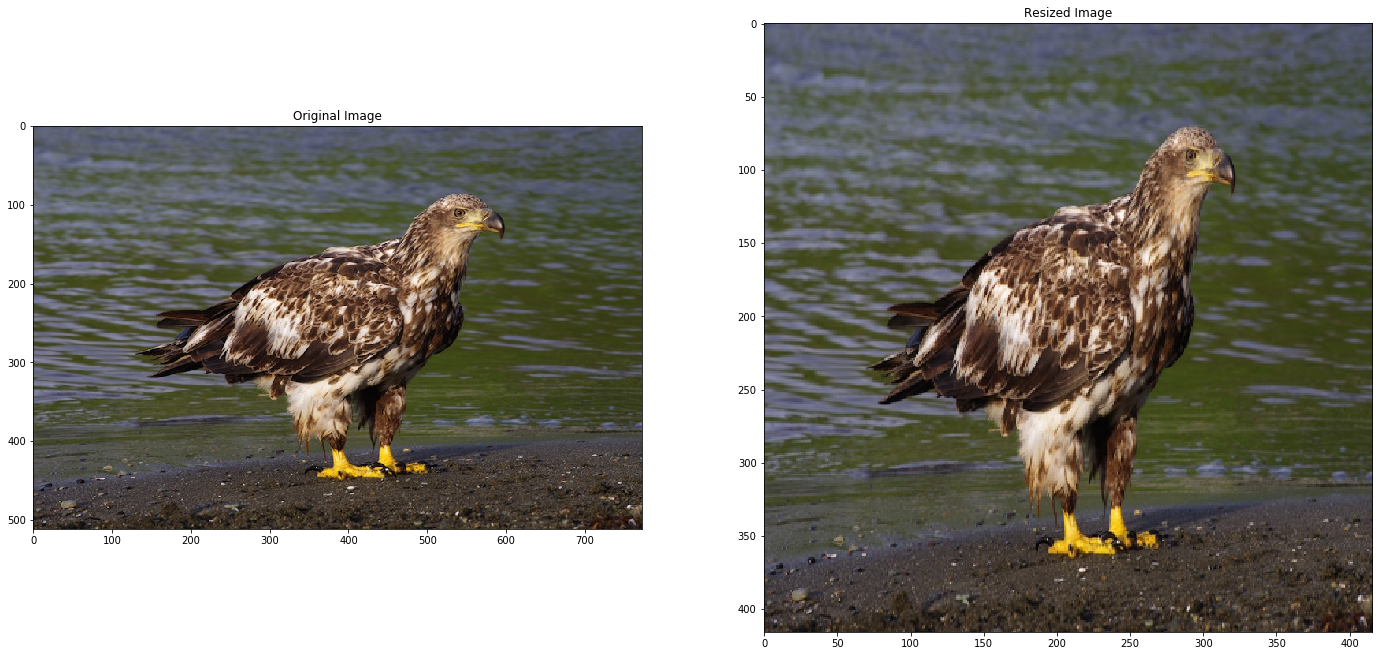

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [24.0, 14.0]
img = cv2.imread('./images/eagle.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
resized_image = cv2.resize(original_image, (m.width, m.height))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()



It took 8.233 seconds to detect the objects in the image.

Number of Objects Detected: 1 

Objects Found and Confidence Level:

1. bird: 0.999984


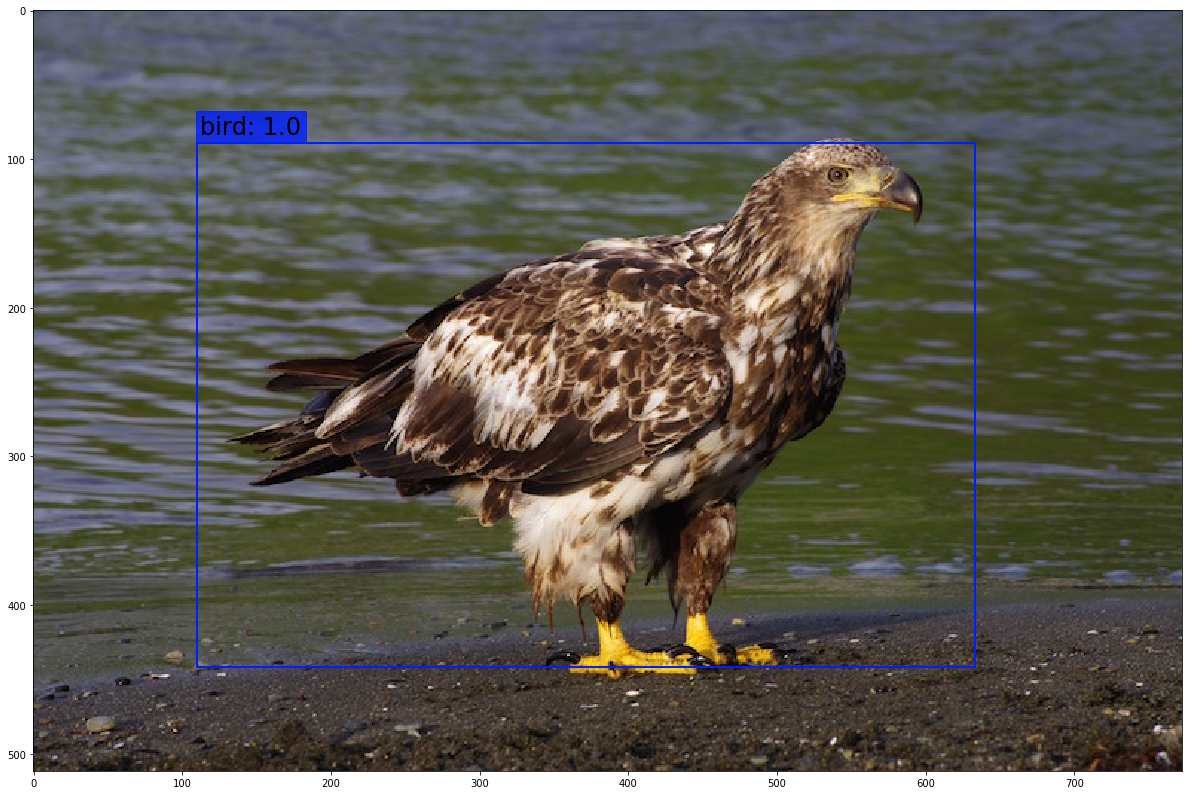

In [5]:

plt.rcParams['figure.figsize'] = [24.0, 14.0]
img = cv2.imread('./images/eagle.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
resized_image = cv2.resize(original_image, (m.width, m.height))
iou_thresh = 0.4
nms_thresh = 0.6
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)

In [17]:
import darknet

In [18]:
darknet.parse_cfg(cfg_file)

[{'angle': '0',
  'batch': '1',
  'burn_in': '1000',
  'channels': '3',
  'decay': '0.0005',
  'exposure': '1.5',
  'height': '416',
  'hue': '.1',
  'learning_rate': '0.001',
  'max_batches': '500200',
  'momentum': '0.9',
  'policy': 'steps',
  'saturation': '1.5',
  'scales': '.1,.1',
  'steps': '400000,450000',
  'subdivisions': '1',
  'type': 'net',
  'width': '416'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '32',
  'pad': '1',
  'size': '3',
  'stride': '1',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '64',
  'pad': '1',
  'size': '3',
  'stride': '2',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '32',
  'pad': '1',
  'size': '1',
  'stride': '1',
  'type': 'convolutional'},
 {'activation': 'leaky',
  'batch_normalize': '1',
  'filters': '64',
  'pad': '1',
  'size': '3',
  'stride': '1',
  'type': 'convolutional'},
 {'activation': 'linear', 'from': '-3', 'type': 

In [14]:
res=m.models[106]

In [15]:
res

YoloLayer()

In [46]:
checkpoint = {'model': m.models,
          'state_dict': m.models.modules.static_dict()}

AttributeError: 'function' object has no attribute 'static_dict'

In [49]:
 m.models.modules

<generator object Module.modules at 0x0000007A025E5048>

In [45]:
torch.save(checkpoint, 'checkpoint.pth')

In [41]:
modeluler.add_module(model[i])

TypeError: add_module() missing 1 required positional argument: 'module'

False